In [136]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

# feature engineering

In [180]:
t=sns.load_dataset('tips')
t.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
# mean and std of total_bill
mean=t['total_bill'].mean()
print(mean)

std=t['total_bill'].std()
print(std)

19.78594262295082
8.902411954856856


In [112]:
normalised=stats.norm.rvs(loc=t['total_bill'].mean(), scale=t['total_bill'].std(), size=len(t))
normalised

array([14.14468535, 17.61022784, 21.37182467, 34.39079493, 22.02427141,
       10.9223525 , 17.74744849, 26.0590636 , 24.05340923, 26.14005504,
       17.9498653 , 38.19649446, 15.38152721, -2.07384598, 21.86177911,
       13.60617104, 21.10852254, 14.18630397, 20.24778788, 25.43338357,
       20.74982721, 12.6386531 ,  9.01405703, 13.83812739, 26.97346073,
       28.43033438, 15.72143769, 22.13095568, 26.52055947, 27.78794546,
       14.70214137, 25.47444134,  6.45963325,  9.0895525 , 26.75822398,
       -0.44421956,  9.08528458, 21.21949422,  8.78972645, 18.33997401,
       38.09167282, 18.54914196, 26.21125003, 26.35825251, 24.55212388,
       25.63349049, 13.9945353 ,  5.88964788,  5.81557148, 15.47927663,
       12.9149095 ,  6.05987207, 34.24631875, 28.57641587, 19.76755488,
       17.15288852,  3.71909215, 25.18801378, 19.27843999, 26.72397912,
       24.43767487, 19.43284364, 14.73070184, 20.8644482 , 15.21866116,
       25.24929082, 21.97001584, 16.1433723 , 19.73918111, 25.61

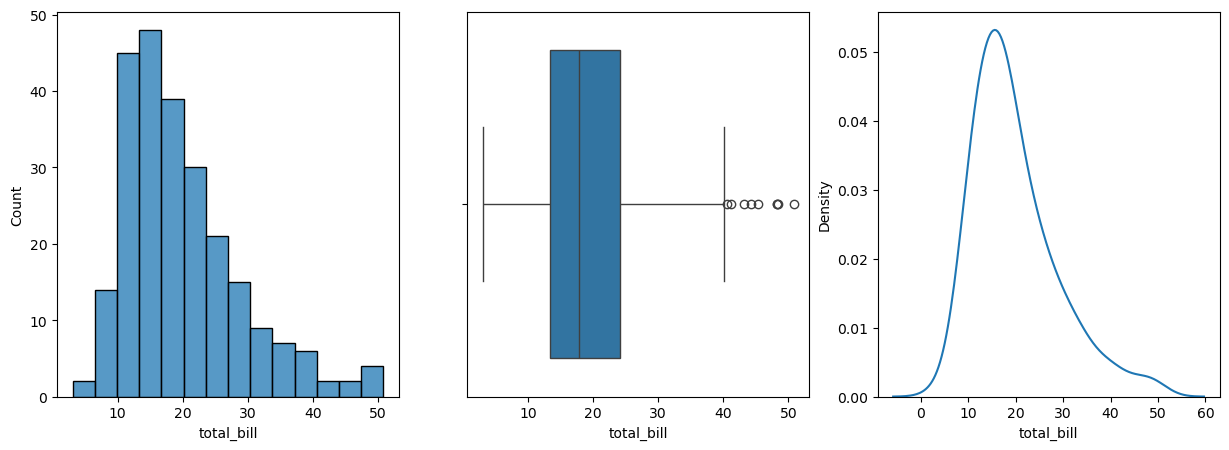

In [114]:
# non normalised 
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(data=t[['total_bill']],x='total_bill',ax=ax[0])
sns.boxplot(data=t[['total_bill']],x='total_bill',ax=ax[1])
sns.kdeplot(data=t[['total_bill']],x='total_bill',ax=ax[2])
plt.show()

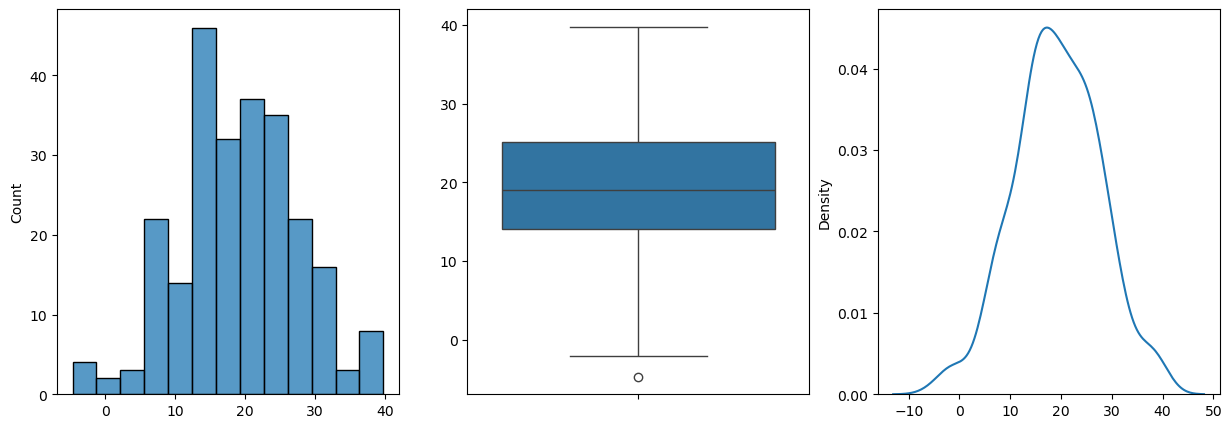

In [120]:
# for normalised
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(data=normalised,ax=ax[0])
sns.boxplot(data=normalised,ax=ax[1])
sns.kdeplot(data=normalised,ax=ax[2])
plt.show()

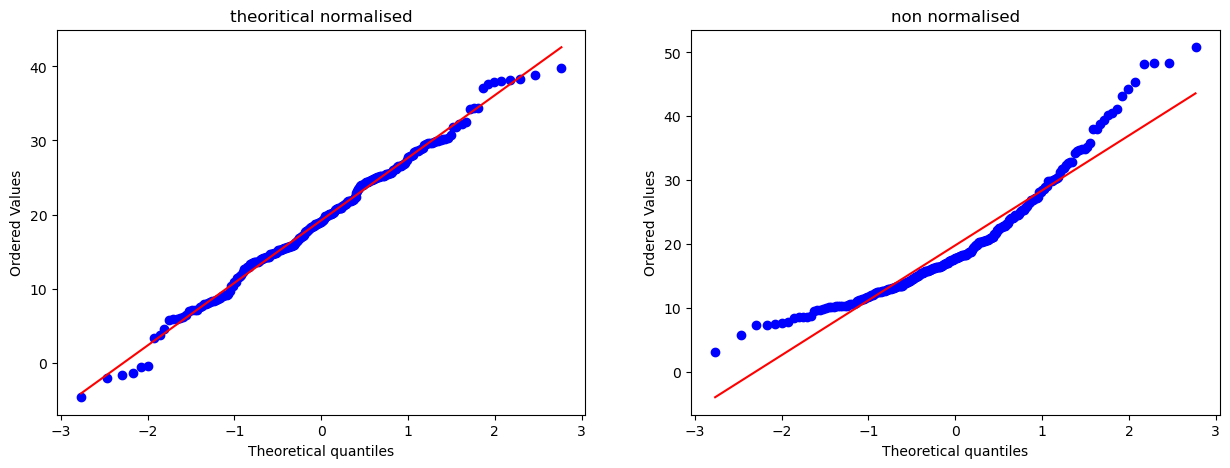

In [126]:
# verify normality
# using QQ plot

fig,ax=plt.subplots(1,2,figsize=(15,5))
stats.probplot(normalised,dist=stats.norm,plot=ax[0])
stats.probplot(t['total_bill'],dist=stats.norm,plot=ax[1])
ax[0].set_title('theoritical normalised')
ax[1].set_title("non normalised")
plt.show()

# feature tranformation

In [182]:
from scipy.stats import boxcox,probplot

In [187]:
# log transorm
log_tb=np.log(t['total_bill']+1)
log_t=np.log(t['tip']+1)

In [189]:
# boxcox
tranformd,lam=boxcox(t['total_bill'])
print('lambda-',lam)
tip_transf,lam=boxcox(t['tip'])
print(lam)

lambda- 0.07691914689665373
-0.06325975978784863


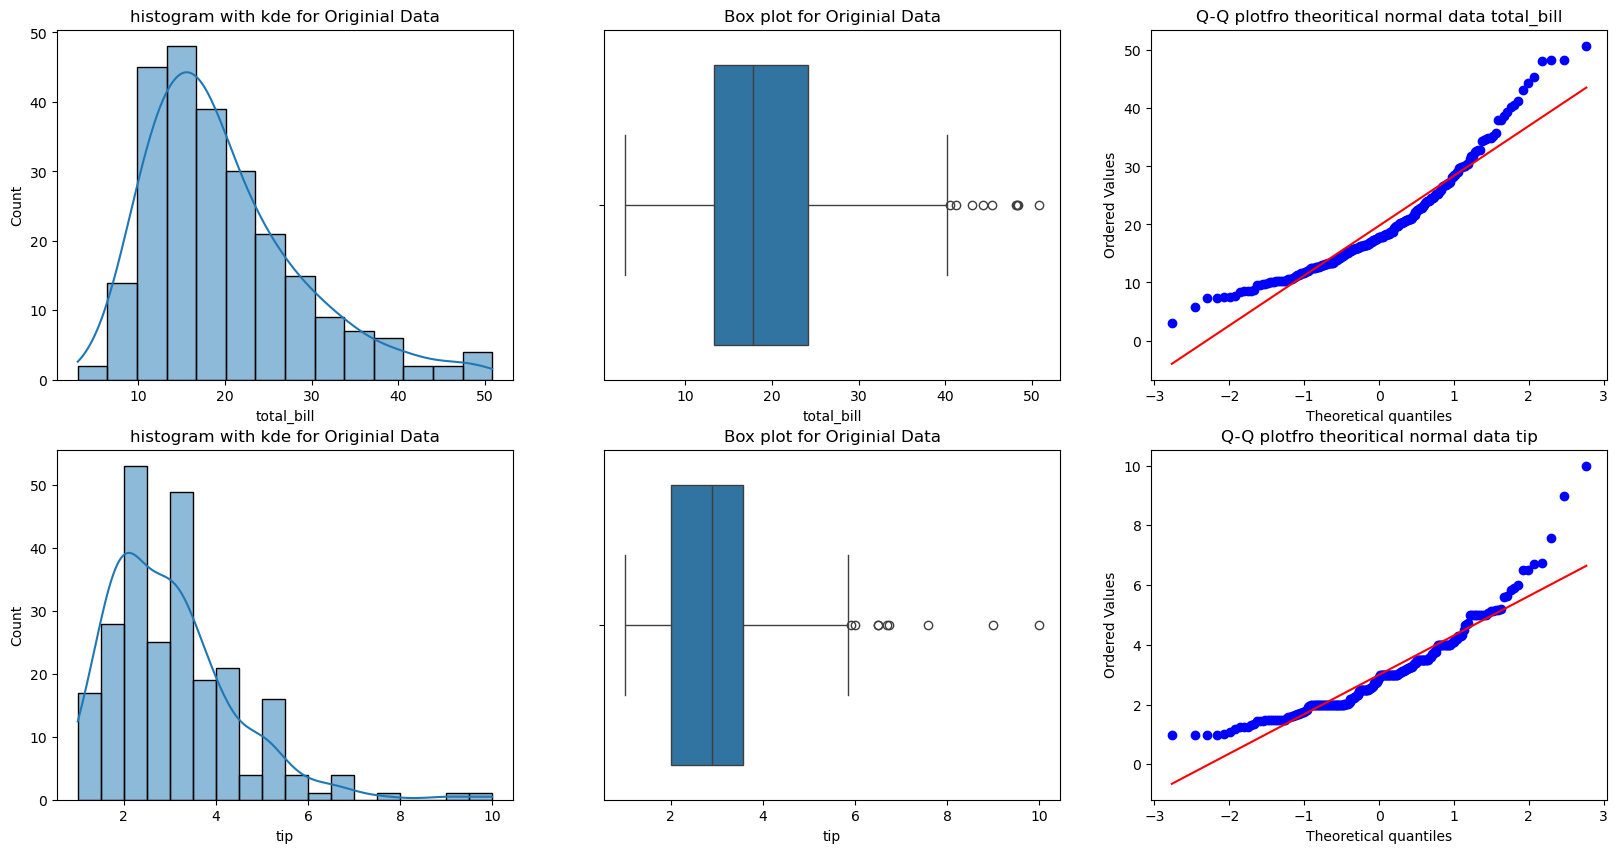

In [197]:
# visualize the original data

fig,ax=plt.subplots(2,3,figsize=(20,10))

#original data total_bill
sns.histplot(data=t,x=t['total_bill'],kde=True,ax=ax[0,0])
stats.probplot(t['total_bill'],dist=stats.norm,plot=ax[0,2])
ax[0,0].set_title('histogram with kde for Originial Data')
ax[0,2].set_title('Q-Q plotfro theoritical normal data total_bill')

sns.boxplot(data=t,x=t['total_bill'],ax=ax[0,1])
ax[0,1].set_title('Box plot for Originial Data')

#original data for tip
sns.histplot(data=t,x=t['tip'],kde=True,ax=ax[1,0])
stats.probplot(t['tip'],dist=stats.norm,plot=ax[1,2])
ax[1,0].set_title('histogram with kde for Originial Data')
ax[1,2].set_title('Q-Q plotfro theoritical normal data tip')

sns.boxplot(data=t,x=t['tip'],ax=ax[1,1])
ax[1,1].set_title('Box plot for Originial Data')

plt.show()

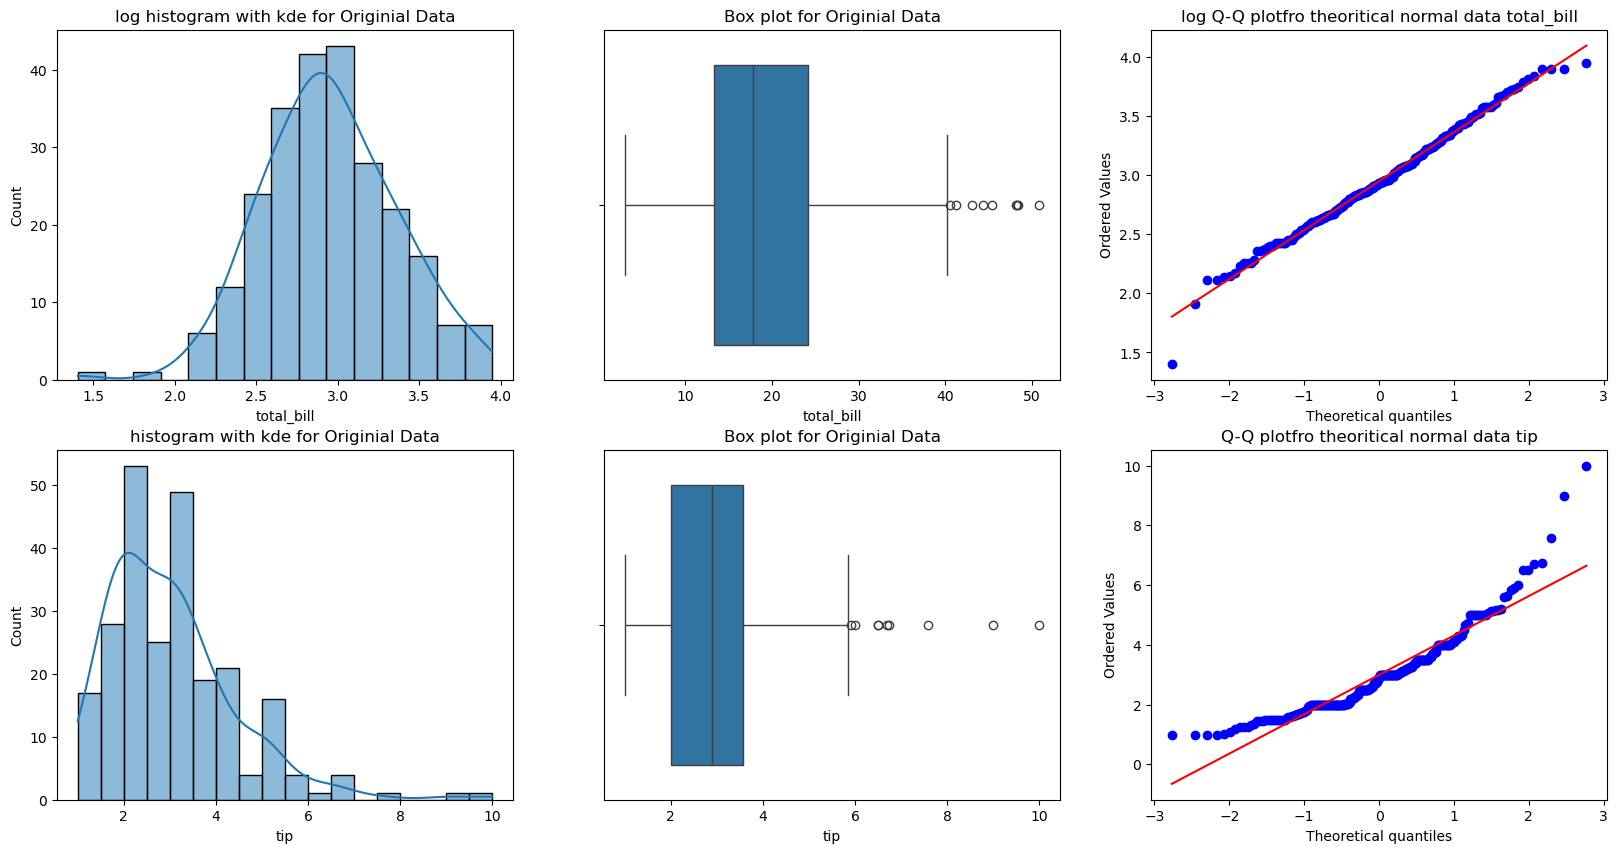

In [199]:
# visualize the original data

fig,ax=plt.subplots(2,3,figsize=(20,10))

#log tranform data total_bill
sns.histplot(data=log_tb,kde=True,ax=ax[0,0])
stats.probplot(log_tb,dist=stats.norm,plot=ax[0,2])
ax[0,0].set_title('log histogram with kde for Originial Data')
ax[0,2].set_title('log Q-Q plotfro theoritical normal data total_bill')

sns.boxplot(data=t,x=t['total_bill'],ax=ax[0,1])
ax[0,1].set_title('Box plot for Originial Data')

# data for tip
sns.histplot(data=t,x=t['tip'],kde=True,ax=ax[1,0])
stats.probplot(t['tip'],dist=stats.norm,plot=ax[1,2])
ax[1,0].set_title('histogram with kde for Originial Data')
ax[1,2].set_title('Q-Q plotfro theoritical normal data tip')

sns.boxplot(data=t,x=t['tip'],ax=ax[1,1])
ax[1,1].set_title('Box plot for Originial Data')

plt.show()